In [0]:
import sys
import os

import xml.etree.ElementTree as elt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
import seaborn as sn
import matplotlib.pyplot as plt


/content/drive/My Drive
/content/drive/My Drive
Confusion Matrix :
[[10504     8    69 ...     0     0     0]
 [   79     8     0 ...     0     0     0]
 [  161     0   145 ...     0     0     0]
 ...
 [    0     0     0 ...     9     0     0]
 [    1     0     0 ...     0  1061     0]
 [    0     0     0 ...     0     0    76]]
Accuracy Score : 0.9202384170915882


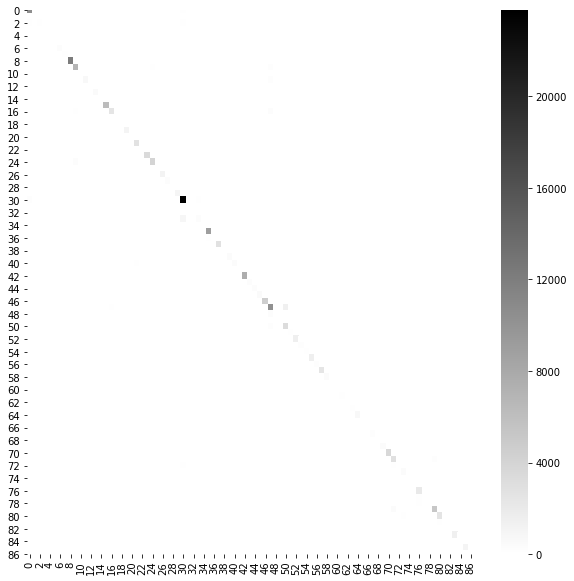

/content


318

In [2]:
%cd /content/drive/My\ Drive/
!pwd
outerfolder = "Train-corups-n/"
outerfolder1 = "Test-Corpus/"
Dict = {}
Dict1 = {}
Dict2={}
taglist=[]
prevtag = '^'
out=""
shpfiles = []
for dirpath, subdirs, files in os.walk(outerfolder):
    for x in files:
        if x.endswith(".xml"):
            shpfiles.append(os.path.join(dirpath, x))
for file in shpfiles:
  tree = elt.parse(file)
  r = tree.getroot()

  for w in r.iter(): #Dict contains word to tag probability and Dict1 contains tag to tag transition probability
    if w.tag=='w':
      word = w.text.strip().lower()

      tag = w.attrib['c5']
      if tag not in taglist:
        taglist.append(tag)
      if tag in Dict:
        if word in Dict[tag]:
          Dict[tag][word]+=1
        else:
          Dict[tag][word]=1
      else:
        innerDict = {}
        innerDict[word] = 1
        Dict[tag] = innerDict

      if prevtag in Dict1:
        if tag in Dict1[prevtag]:
          Dict1[prevtag][tag]+=1
        else:
          Dict1[prevtag][tag]=1
      else:
        innerDict = {}
        innerDict[tag] = 1
        Dict1[prevtag] = innerDict
      prevtag = tag

      if word in Dict2:
        if tag in Dict2[word]:
          Dict2[word][tag]+=1
        else:
          Dict2[word][tag]=1
      else:
        innerDict={}
        innerDict[tag]=1
        Dict2[word]=innerDict

    elif w.tag=='c':
      tag = "."
      if prevtag in Dict1:
        if tag in Dict1[prevtag]:
          Dict1[prevtag][tag]+=1
        else:
          Dict1[prevtag][tag]=1
      else:
        innerDict = {}
        innerDict[tag] = 1
        Dict1[prevtag] = innerDict
      prevtag = '^'

#Calculating Probability in Dict and Dict1
for i in Dict:
  count = 0
  for j in Dict[i]:
    count+=Dict[i][j]
  for j in Dict[i]:
    Dict[i][j]=Dict[i][j]/count

for i in Dict1:
  count = 0
  for j in Dict1[i]:
    count+=Dict1[i][j]
  for j in Dict1[i]:
    Dict1[i][j]=Dict1[i][j]/count


#test
shpfiles1 = []
actual = []
predicted = []
for dirpath, subdirs, files in os.walk(outerfolder1):
    for x in files:
        if x.endswith(".xml"):
            shpfiles1.append(os.path.join(dirpath, x))
for file in shpfiles1:
  tree = elt.parse(file)
  r = tree.getroot()
  seq=[]
  sentence=""
  for w in r.iter(): # taking valid words
    if w.tag=='w' and str(w.text.strip().lower()) in Dict2:
      seq.append(w.text.strip().lower())
      sentence+= w.text.strip().lower()+" "
      actual.append(w.attrib['c5'])
    elif w.tag=='c' and len(sentence) !=0:
      #print(sentence)

      #applying the algorithm
      pbt=[]
      for t in taglist:
        pbt.append(1.0)
      cpbt=[]
      pt='^'

      #base/ first column
      for t in taglist:
        mx=0.0
        for p in range(len(pbt)):
          if t in Dict1[pt] and t in Dict and seq[0] in Dict[t]:
            score=pbt[p]*Dict1[pt][t]*Dict[t][seq[0]]*1000
            mx=max(mx,score)
        cpbt.append(mx)
      ans=[]

      mx1=0
      index=0
      for i in range(len(cpbt)):
        if cpbt[i]>mx1:
          mx1=cpbt[i]
          index=i;
      ans.append(taglist[index])
      predicted.append(taglist[index])
      pbt=cpbt

      #rest of the columns

      for i in range(1, len(seq)):
        cpbt1=[]
        for t in taglist:
          mx=0
          for p in range(len(pbt)):
            if t in Dict1[taglist[p]] and t in Dict and seq[i] in Dict[t]:
              score=pbt[p]*Dict1[taglist[p]][t]*Dict[t][seq[i]]
              mx=max(mx,score)
          cpbt1.append(mx)
          
        mx2=0
        index2=0
        for k in range(len(cpbt1)):
          if cpbt1[k]>mx2:
            mx2=cpbt1[k]
            index2=k
        ans.append(taglist[index2])
        predicted.append(taglist[index2])
        pbt=cpbt1

      tagseq=""
      for i in range(len(ans)):
        tagseq= tagseq+ans[i]+" "

      ans.clear()

        #output the the tag in the file
        
      out+= "The word sequence is "+ sentence+" and the tag sequence is "+tagseq+"\n"
      seq.clear()
      sentence=""


out3 = "Confusion Matrix :" + "\n"
results = confusion_matrix(actual, predicted)
out3+=str(results)+"\n"
out3+="Accuracy Score : " + str(accuracy_score(actual, predicted))

print(out3)
plt.figure(figsize=(10,10))
sn.heatmap(results, cmap='gray_r')
plt.show()


%cd /content


out1 = open("Week9_output.txt",'w');
out1.write(out)

out4 = open("Week92_output.txt",'w');
out4.write(out3)
  



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
